In [29]:
#Importo librerías
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
import math
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np


In [2]:
#Importamos los datos como dataframe
columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num_discreta']
df = pd.read_csv('datos.data', names=columnas, header=0)

In [3]:
#Defino mis datos de entrenamiento -> 25% de datos entrenamiento y el 75% testeo
data_train = df.iloc[1:76, :]
data_test = df.iloc[76:, :]

#print(data_train)
#print(data_test)

In [4]:
#Modelo a entrenar con datos de entrenamiento
model = BayesianNetwork(
    [ ("age","num_discreta"),
     ("sex","num_discreta"),
     ("num_discreta","thal"),
     ("num_discreta","exang"),
     ("num_discreta","slope"),
     ("num_discreta","cp"),
     ("num_discreta","oldpeak"),
     ("num_discreta","ca"),

    ]

)
model.fit(data_train, estimator=MaximumLikelihoodEstimator)

In [5]:
#Miro probabilidades del modelo usando evidencia datos de entrenamiento
lista_mio =[]

inferencia_mio = VariableElimination(model)

for i in range(1,len(data_train)):

    proba_mio = inferencia_mio.query(variables = ['num_discreta'], evidence={'age': data_train["age"][i],'sex': data_train["sex"][i], 'cp': data_train["cp"][i],
    'exang': data_train["exang"][i], 'oldpeak': data_train["oldpeak"][i],'slope': data_train["slope"][i], 'ca': data_train["ca"][i], 'thal': data_train["thal"][i]})
    #print(proba_mio.values)

    if proba_mio.values[0] <= 0.5:
        lista_mio.append(0) #no enfermedad 
    if proba_mio.values[1] > 0.5:
        lista_mio.append(1) #si enfermedad
    if proba_mio.values[0] == 1:
        lista_mio.append(1) #sí enfermedad 
    if proba_mio.values[1] == 1:
        lista_mio.append(0) #sí enfermedad

#print(proba_mio)
#print(lista_mio)
#len(lista_mio) #hay un problema porque sólo entran 60, deberían entrar todos
#tipos_datos = set(type(elem) for elem in lista_mio)
#print(tipos_datos)
#print(df["num_discreta"].dtypes) como es tipo object son str, tengo que pasarlos a numero



75

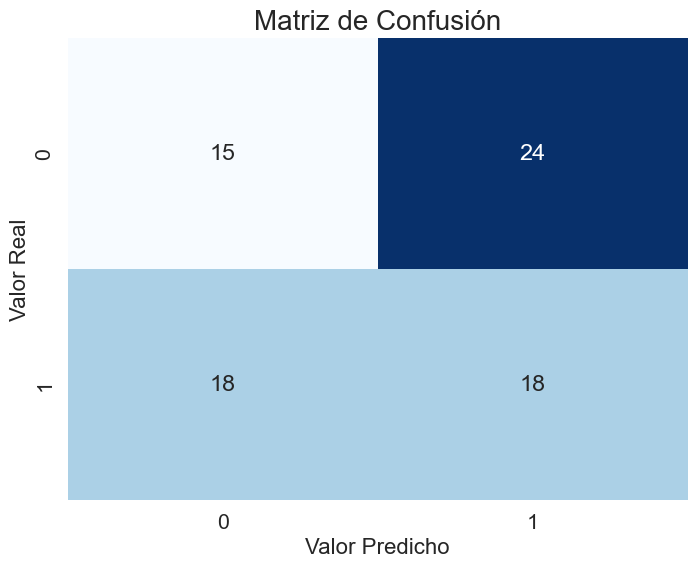

In [7]:
#Matriz confusion

y_true = df["num_discreta"][:75] # valores verdaderos
y_pred = lista_mio # valores predichos
matriz_confusion = confusion_matrix(y_true, y_pred)

# Configuramos la visualización de la matriz
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.4) # tamaño de la fuente
sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='g', cbar=False)

# Configuramos las etiquetas
ax.set_xlabel('Valor Predicho', fontsize=16)
ax.set_ylabel('Valor Real', fontsize=16)
ax.set_title('Matriz de Confusión', fontsize=20)

# Mostramos la matriz de confusión
plt.show()


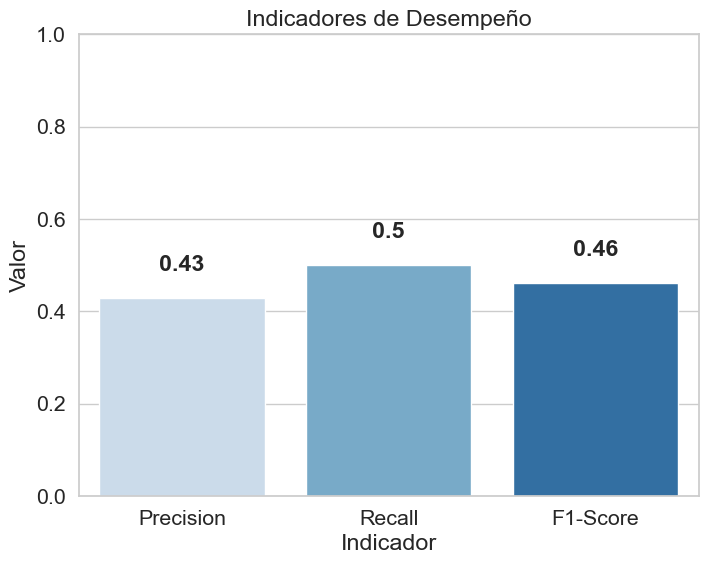

In [17]:
#indicadores precision, recall, f1-score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Indicadores de desempeño
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1score = f1_score(y_true, y_pred)

# Gráfica de barras
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision, recall, f1score], palette='Blues')
plt.ylim(0, 1)
plt.title('Indicadores de Desempeño')
plt.xlabel('Indicador')
plt.ylabel('Valor')
for index, value in enumerate([precision, recall, f1score]):
    plt.text(index, value+0.05, str(round(value, 2)), ha='center', va='bottom', fontweight='bold')

plt.show()

#1 vez con mi modelo, la segunda con lo de python, la tercera con el del otro grupo


In [25]:
#--------------------------------------------------------------------------------------------
#-----------Ahora miramos comparativa entre el modelo que hace método de python -------------
#--------------------------------------------------------------------------------------------

#Primero estimamos con método K2Score

from pgmpy.estimators import K2Score, HillClimbSearch
# Crear una instancia de K2Score
scoring_method = K2Score(data=data_train)

# Crear una instancia de HillClimbSearch
est_hill_climb = HillClimbSearch(data=data_train)

# Estimar la estructura del modelo
estimated_model = est_hill_climb.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)


  0%|          | 27/10000 [00:02<17:12,  9.66it/s] 

DAG with 14 nodes and 27 edges
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num_discreta']
[('sex', 'age'), ('sex', 'restecg'), ('sex', 'exang'), ('cp', 'exang'), ('trestbps', 'thalach'), ('trestbps', 'oldpeak'), ('trestbps', 'chol'), ('chol', 'age'), ('fbs', 'oldpeak'), ('restecg', 'thalach'), ('thalach', 'chol'), ('oldpeak', 'restecg'), ('oldpeak', 'exang'), ('slope', 'oldpeak'), ('slope', 'thalach'), ('ca', 'oldpeak'), ('thal', 'num_discreta'), ('thal', 'sex'), ('thal', 'restecg'), ('thal', 'chol'), ('num_discreta', 'cp'), ('num_discreta', 'slope'), ('num_discreta', 'ca'), ('num_discreta', 'restecg'), ('num_discreta', 'thalach'), ('num_discreta', 'age'), ('num_discreta', 'chol')]


In [26]:
print(estimated_model)
print(estimated_model.nodes())
print(estimated_model.edges())

DAG with 14 nodes and 27 edges
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num_discreta']
[('sex', 'age'), ('sex', 'restecg'), ('sex', 'exang'), ('cp', 'exang'), ('trestbps', 'thalach'), ('trestbps', 'oldpeak'), ('trestbps', 'chol'), ('chol', 'age'), ('fbs', 'oldpeak'), ('restecg', 'thalach'), ('thalach', 'chol'), ('oldpeak', 'restecg'), ('oldpeak', 'exang'), ('slope', 'oldpeak'), ('slope', 'thalach'), ('ca', 'oldpeak'), ('thal', 'num_discreta'), ('thal', 'sex'), ('thal', 'restecg'), ('thal', 'chol'), ('num_discreta', 'cp'), ('num_discreta', 'slope'), ('num_discreta', 'ca'), ('num_discreta', 'restecg'), ('num_discreta', 'thalach'), ('num_discreta', 'age'), ('num_discreta', 'chol')]


In [33]:
#Ahora hacemos comparativa

#Obtener las inferencias de tu modelo en los datos de prueba
y_true = data_test["num_discreta"]
y_pred_mio = model.predict_probability(data_test.drop(columns=["num_discreta"]))

#Usar el modelo estimado con K2Score para hacer inferencias en los mismos datos de prueba
y_pred_k2 = estimated_model.predict(data_test.drop(columns=["num_discreta"]))

#Calcular la matriz de confusión comparando las inferencias del paso 1 con las del paso 2
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz_confusion_mio = confusion_matrix(y_true, y_pred_mio)
matriz_confusion_k2 = confusion_matrix(y_true, y_pred_k2)

fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.heatmap(matriz_confusion_mio, annot=True, cmap="Blues", fmt='g', ax=axs[0])
axs[0].set_title('Matriz de confusión - Mi modelo')

sns.heatmap(matriz_confusion_k2, annot=True, cmap="Blues", fmt='g', ax=axs[1])
axs[1].set_title('Matriz de confusión - Modelo K2Score')

plt.show()



AttributeError: 'DAG' object has no attribute 'predict_probability'

In [ ]:
#Ahora comparativa entre modelo del otro grupo 